**CS 412 - MACHINE LEARNING**

**HW1 - PART 1**

İpek Akkuş - 30800






**1. Data Generation**

Write a function *random_points(num_points*, *num_dimensions*) to generate numbers from a Normal distribution, *num_points* random points in a *num_dimensions* dimensional space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Step 1: Data Generation
def random_points(num_points, num_dimensions):
    return np.random.normal(0, 1, size=(num_points, num_dimensions))

In [3]:
# Generate points_3d to observe what random_points function returns
points_3d = random_points(num_points=10, num_dimensions=3)
print(points_3d)

[[-1.10929346 -0.10203787 -0.78796211]
 [ 2.70123914  1.33067913 -0.9178668 ]
 [ 0.80670087 -1.51429511 -0.74698103]
 [ 1.48653827 -0.11757856 -0.78348433]
 [-0.42954115 -0.03705059 -0.27924082]
 [-0.09547888 -0.79109156  1.58572253]
 [-0.36865313 -0.06021195 -1.21919259]
 [-0.13609616  0.89108727 -0.0377206 ]
 [-3.1723142  -1.08354982  0.47896191]
 [-2.22710338  0.70119854 -0.83188319]]


**2. Distance Calculation**

Write a function distance(p1, p2) to calculate the Euclidean distance between two points p1 and p2.


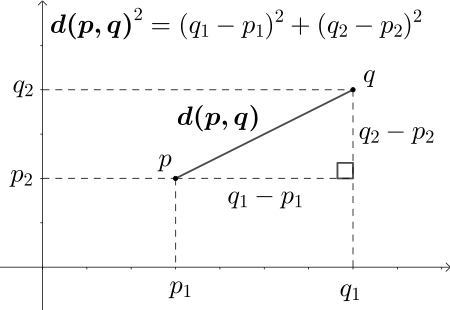

In [4]:
# Step 2: Distance Calculation
def distance(p1, p2):
    squared_differences = np.square(p1 - p2)
    sum_squared_differences = np.sum(squared_differences)
    return np.sqrt(sum_squared_differences)

In [5]:
# Generate dist to observe what distance function returns
p1 = points_3d[0]
p2 = points_3d[1]
dist = distance(p1, p2)
print(f"Distance between points {p1} and {p2} is {dist}")

Distance between points [-1.10929346 -0.10203787 -0.78796211] and [ 2.70123914  1.33067913 -0.9178668 ] is 4.073047009851422


**3. Average Distance**

Write a function average_distance(points) to calculate the average distance between all pairs of points in the dataset points.


In [6]:
# Step 3: Average Distance
def average_distance(points):
    num_points = len(points)
    total_distance = 0
    for i in range(num_points):
        for j in range(i + 1, num_points):
            total_distance += distance(points[i], points[j])
    #print (f"Total distance is {total_distance}")
    return total_distance / (num_points * (num_points - 1) / 2) # (num_points * (num_points - 1) / 2) gives the  number of ways
                                                                  # to choose 2 points out of num_points without considering the order

In [7]:
# Generate avg_dist to observe what average_distance function returns
# Call the average_distance function with points_3d as the argument
avg_dist = average_distance(points_3d)
# Print the result
print(f"The average distance between all pairs of points in the dataset is {avg_dist}")

The average distance between all pairs of points in the dataset is 2.726508618636111


**4. Minimum Distance**

Write a function minimum_distance(points) to calculate the minimum distance between any two points in the dataset points.


In [8]:
# Step 4: Minimum Distance
def minimum_distance(points):
    num_points = len(points)
    min_dist = float('inf')
    for i in range(num_points):
        for j in range(i + 1, num_points):
            dist = distance(points[i], points[j])
            if dist < min_dist:
                min_dist = dist
    return min_dist

In [9]:
# Generate min_dist to observe what minimum_distance function returns
min_dist = minimum_distance(points_3d)
print(f"The minimum distance between any two points in the dataset is {min_dist}")

The minimum distance between any two points in the dataset is 0.8515185832432206


**5. Closest-to-Average Ratio**

Write a function closest_to_average_ratio(min_dist, avg_dist) to calculate the ratio of the closest distance to the average distance.

The purpose of this ratio is to provide a sense of how the closest pair of points relates to the overall distribution of distances between points.


- If the ratio is close to 0, it means that the minimum distance is much smaller than the average distance, indicating that there are some points that are much closer to each other than most other pairs of points.
- If the ratio is close to 1, it means that the minimum distance is similar to the average distance, indicating that the points are more uniformly spaced.

In [10]:
# Step 5: Closest-to-Average Ratio
def closest_to_average_ratio(min_dist, avg_dist):
    return min_dist / avg_dist

In [11]:
# Generate ratio to observe what closest_to_average_ratio function returns
ratio = closest_to_average_ratio(min_dist, avg_dist)
print(f"The closest-to-average ratio for the dataset is {ratio}")

The closest-to-average ratio for the dataset is 0.31231098167926497


**6. Experimentation and Visualization**

Perform the following steps :

• Generate 1000 random points for each dimension from 1 to 100. So for d=1 you will have 1000 data points, for d=2, 1000 data points, etc.

• For each dimension, select a random point and calculate the average distance, minimum distance, and closest-to-average ratio. Perform this step 100 times.

• Aggregate the results and compute the mean and standard deviation across these 100 iterations
 for each dimension.

• Plot the mean and standard deviation as a line plot against the number of dimensions on the
 same graph.

• Plot a histogram of distances for cases when you use the first 2, 5, 10, 100 dimensions.

• Analyze, interpret, and discuss the trends observed in the plots.

**6.1 - First Step**

Generate 1000 random points for each dimension from 1 to 100. So for d=1 you will have 1000 data points, for d=2, 1000 data points, etc.

In [12]:
# Generate 1000 random points for each dimension from 1 to 100
points_by_dimension = {}
for dim in range(1, 101):
    points_by_dimension[dim] = random_points(num_points=1000, num_dimensions=dim)

In [13]:
print("First 5 points for dimension 1:")
print(points_by_dimension[1][:5])
print("\nFirst 5 points for dimension 2:")
print(points_by_dimension[2][:5])
print("\nFirst 5 points for dimension 10:")
print(points_by_dimension[10][:5])
print("\nFirst 5 points for dimension 100:")
print(points_by_dimension[100][:5])

First 5 points for dimension 1:
[[-0.26984024]
 [-0.8730612 ]
 [ 1.07566956]
 [-0.21326678]
 [ 0.21275549]]

First 5 points for dimension 2:
[[-1.69366309 -1.9366176 ]
 [ 0.83456341 -1.41003232]
 [-0.56064124 -0.89557134]
 [-0.87369693 -1.12664785]
 [-0.34004985 -2.22670438]]

First 5 points for dimension 10:
[[-0.99691683  1.44027654  0.20204567  0.55368526  0.14324842  0.76818234
   0.19016771  0.66192724  1.28239762  0.03294284]
 [-0.52684374 -0.41779691  0.02680002 -0.369059   -0.592252    0.74851703
  -0.87280206 -0.1803269  -0.71085848  0.06554501]
 [-0.63244748 -0.95211524 -0.30293048 -0.39399765  0.66153975  0.24300548
  -0.01652628 -1.1445609  -0.3267961  -0.42043427]
 [ 0.00603971 -0.0396867  -0.96025776  0.77012246 -1.66427561  0.7850548
   0.66222856 -0.27710225 -0.77842742 -0.1193726 ]
 [-0.41691489  2.02596187 -0.80630747 -0.19670069  0.74803737 -0.4977222
  -0.68419824 -0.69298395 -0.98332883 -2.18198903]]

First 5 points for dimension 100:
[[-1.41519488e+00  1.57680380e

**6.2 & 6.3 - Second and Third Step**

For each dimension, select a random point and calculate the average distance, minimum distance, and closest-to-average ratio. Perform this step 100 times.


In [14]:
# Initialize dictionaries to store the aggregated results
mean_avg_distances = {}
std_avg_distances = {}
mean_min_distances = {}
std_min_distances = {}
mean_ratios = {}
std_ratios = {}

In [15]:
# Perform the calculations 100 times for each dimension
for dim in range(1, 101):
    avg_distances = []
    min_distances = []
    ratios = []

    # Repeat the process 100 times
    for _ in range(100):
        # Select a random point
        selected_point = random.choice(points_by_dimension[dim])

        # Calculate the average and minimum distances from the selected point
        distances = [distance(selected_point, point) for point in points_by_dimension[dim] if not np.array_equal(selected_point, point)]
        avg_dist = np.mean(distances)
        min_dist = np.min(distances)

        # Calculate the closest-to-average ratio
        ratio = min_dist / avg_dist if avg_dist != 0 else 0

        # Store the results
        avg_distances.append(avg_dist)
        min_distances.append(min_dist)
        ratios.append(ratio)

    # Aggregate the results by computing the mean and standard deviation
    mean_avg_distances[dim] = np.mean(avg_distances)
    std_avg_distances[dim] = np.std(avg_distances)
    mean_min_distances[dim] = np.mean(min_distances)
    std_min_distances[dim] = np.std(min_distances)
    mean_ratios[dim] = np.mean(ratios)
    std_ratios[dim] = np.std(ratios)

# Print the aggregated results for a few dimensions as an example
for dim in [1, 2, 5, 25, 50, 100]:
    print(f"Dimension {dim}:")
    print(f"  Mean Average Distance: {mean_avg_distances[dim]} (std: {std_avg_distances[dim]})")
    print(f"  Mean Minimum Distance: {mean_min_distances[dim]} (std: {std_min_distances[dim]})")
    print(f"  Mean Closest-to-Average Ratio: {mean_ratios[dim]} (std: {std_ratios[dim]})")


Dimension 1:
  Mean Average Distance: 1.1715395044651424 (std: 0.4336083342749526)
  Mean Minimum Distance: 0.004060927747988822 (std: 0.011665966626435738)
  Mean Closest-to-Average Ratio: 0.002513762807851491 (std: 0.0045003281979496225)
Dimension 2:
  Mean Average Distance: 1.8540444152174254 (std: 0.56167758831675)
  Mean Minimum Distance: 0.08782388842293115 (std: 0.09020916901646114)
  Mean Closest-to-Average Ratio: 0.04273525988236909 (std: 0.027233987178638452)
Dimension 5:
  Mean Average Distance: 2.9502218599177077 (std: 0.4571250351204514)
  Mean Minimum Distance: 0.7162292098007608 (std: 0.2781530974624357)
  Mean Closest-to-Average Ratio: 0.23766110952382022 (std: 0.0589639220787134)
Dimension 25:
  Mean Average Distance: 7.110844090635253 (std: 0.5165548279655646)
  Mean Minimum Distance: 4.426831414225544 (std: 0.5597273477478135)
  Mean Closest-to-Average Ratio: 0.6209540399912155 (std: 0.0459260505960008)
Dimension 50:
  Mean Average Distance: 9.952366043606721 (std: 0

**6.4 - Fourth Step**

Plot the mean and standard deviation as a line plot against the number of dimensions on the
 same graph.

In [17]:
# Prepare the data for plotting
mean_avg_distances_list = [mean_avg_distances[dim] for dim in range(1, 101)]
std_avg_distances_list = [std_avg_distances[dim] for dim in range(1, 101)]
mean_min_distances_list = [mean_min_distances[dim] for dim in range(1, 101)]
std_min_distances_list = [std_min_distances[dim] for dim in range(1, 101)]
mean_ratios_list = [mean_ratios[dim] for dim in range(1, 101)]
std_ratios_list = [std_ratios[dim] for dim in range(1, 101)]
dimensions = list(range(1, 101))

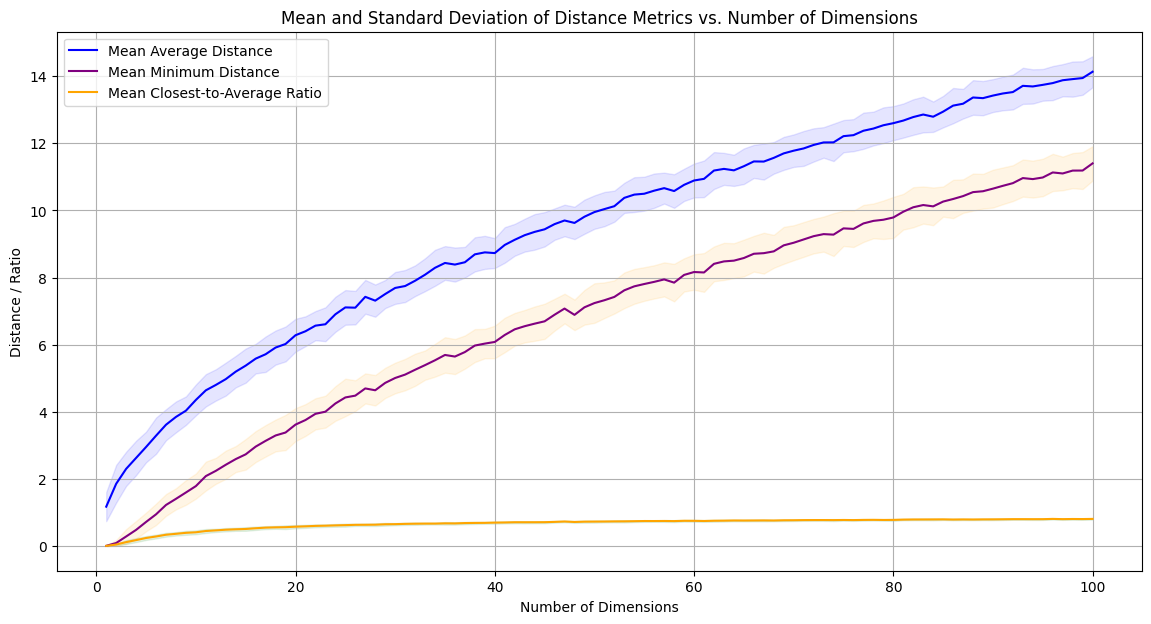

In [22]:
# Plot the mean with standard deviation as a shaded area
plt.figure(figsize=(14, 7))

# Mean Average Distance with Standard Deviation
plt.plot(dimensions, mean_avg_distances_list, label='Mean Average Distance', color='blue')
plt.fill_between(dimensions,
                 [m - s for m, s in zip(mean_avg_distances_list, std_avg_distances_list)],
                 [m + s for m, s in zip(mean_avg_distances_list, std_avg_distances_list)],
                 color='blue', alpha=0.1)

# Mean Minimum Distance with Standard Deviation
plt.plot(dimensions, mean_min_distances_list, label='Mean Minimum Distance', color='purple')
plt.fill_between(dimensions,
                 [m - s for m, s in zip(mean_min_distances_list, std_min_distances_list)],
                 [m + s for m, s in zip(mean_min_distances_list, std_min_distances_list)],
                 color='orange', alpha=0.1)

# Mean Closest-to-Average Ratio with Standard Deviation
plt.plot(dimensions, mean_ratios_list, label='Mean Closest-to-Average Ratio', color='orange')
plt.fill_between(dimensions,
                 [m - s for m, s in zip(mean_ratios_list, std_ratios_list)],
                 [m + s for m, s in zip(mean_ratios_list, std_ratios_list)],
                 color='green', alpha=0.1)

plt.xlabel('Number of Dimensions')
plt.ylabel('Distance / Ratio')
plt.title('Mean and Standard Deviation of Distance Metrics vs. Number of Dimensions')
plt.legend()
plt.grid(True)
plt.show()

**6.5 - Fifth Step**

Plot a histogram of distances for cases when you use the first 2, 5, 10, 100 dimensions.

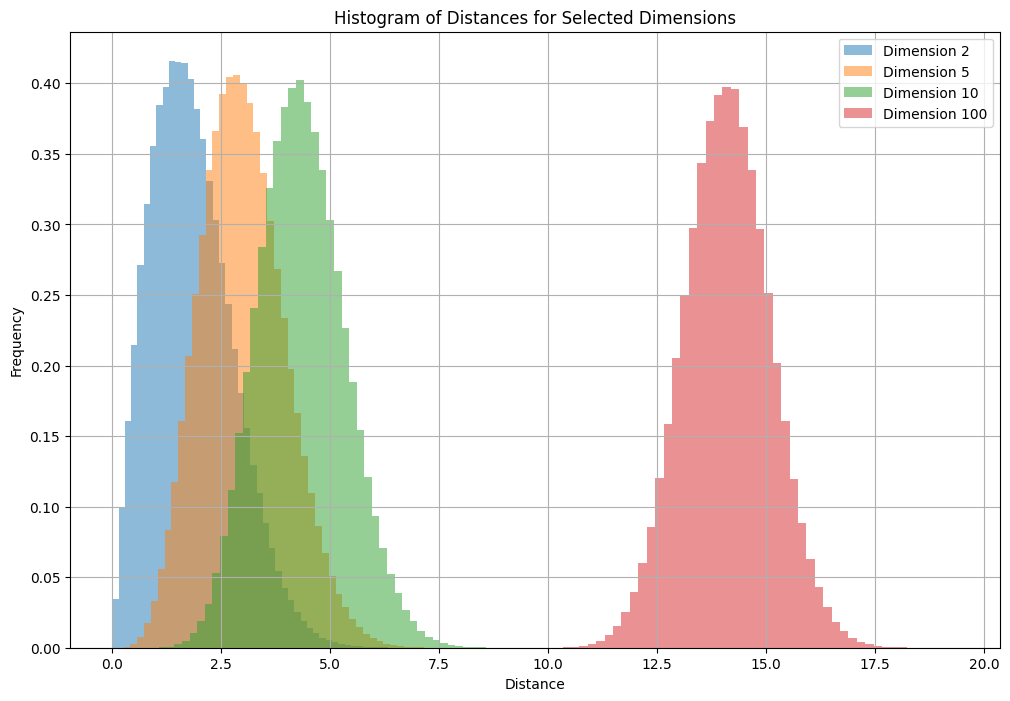

In [19]:
# Selected dimensions for the histograms
selected_dimensions = [2, 5, 10, 100]

# Plot histograms of distances for selected dimensions
plt.figure(figsize=(12, 8))
for dim in selected_dimensions:
    # Generate 1000 random points for the current dimension
    points = np.random.randn(1000, dim)
    # Calculate all pairwise distances
    distances = [distance(points[i], points[j]) for i in range(len(points)) for j in range(i + 1, len(points))]
    plt.hist(distances, bins=50, alpha=0.5, label=f'Dimension {dim}', density=True)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances for Selected Dimensions')
plt.legend()
plt.grid(True)
plt.show()

# Analyzing the Plots

1. **Mean and Standard Deviation of Distance Metrics vs. Number of Dimensions:**

  - The line plot shows a clear trend where the mean average distance and mean minimum distance between points increase as the number of dimensions increases. This is in line with the curse of dimensionality, where the space becomes sparser, and points are generally farther apart in higher-dimensional spaces.
  - The closest-to-average ratio starts off high in low dimensions, indicating a significant difference between the closest and average distances. However, as the number of dimensions increases, the ratio flattens out. This suggests that in higher dimensions, the closest distances become more comparable to the average distances. The flattening of the curve indicates that as dimensionality grows, points become equidistant from each other, which can challenge the effectiveness of distance-based machine learning algorithms.
  - The shaded areas representing the standard deviation grow wider as dimensions increase, particularly for the average and minimum distances. This widening indicates increasing variability in distances with higher dimensions, further emphasizing the sparsity of the space.
  - From the trends observed, we can conclude that as the dimensionality increases, both the average and minimum distances between points increase, and the distances become more **uniformly distributed.** The closest-to-average ratio suggests that in higher dimensions, points are not just farther apart on average, but also the closest points are not significantly closer than the average distance. This could have implications for high-dimensional data analysis, such as in clustering and nearest-neighbor algorithms, where the concept of "nearness" becomes less distinct in high dimensions.

2. **Histogram of Distances for Selected Dimensions:**

  - The histogram compares the distribution of pairwise distances in 2, 5, 10, and 100 dimensions. In lower dimensions (2 and 5), the distributions have wider shapes, indicating a larger variability in distances. As the number of dimensions increases, the histograms become taller and narrower, centering around the mean distance.
  - By dimension 100, the histogram shows that the distances are highly concentrated around the mean. This reflects a common characteristic of high-dimensional geometry where points are often almost the same distance from each other.
  - The peak of the histogram shifts to the right as we move to higher dimensions, which visually confirms that the average distance between points increases with dimensionality.


